# In class exercise for Tutorial 13: Looping back and forward a little

### Set up your GitHub Repo for the exercise

For this exercise we will ask you to go back to the beginning of the semester and use GitHub. We will also practice with loops and if statements.

To get started follow these instructions:

  (1) Create a new GitHub repository under your account on GitHub.com called 'FDS-2022-Exercises' 
  
  (2) Clone the repository locally on your computer. Say under your local 'git' folder 
  
  (3) Initialize it as your like it (add a readme file, a license, etc)
  
  (4) Create a new file inside the repository locally: tutorial13Exercise_<YourInitialshere>.ipynb
  
  (5) Add the file to the Gitreposiory 
  
  (6) Commit the to the repository and push it to the cloud.
  
  (7) Use the above jupyter notebook and the repository you set up to complete the exercises below.

The PDF submitted on canvas of tutorial13Exercise_YourInitials.ipynb will need to report the URL of the jupyter notebook from your repository on GitHub.com. You can add the URL in the following cell.

URL of your tutorial13Exercise on GitHub:

### Simulating data

Create 5 distributions of 1,000 normally distributed random data with the following characteristics:
 - Dist 1: mean = 5 SD = 2
 - Dist 2: mean = 7 SD = 4
 - Dist 3: mean = 9 SD = 6
 - Dist 4: mean = 11 SD = 8
 - Dist 5: mean = 13 SD = 10
 
 Use for loops to generate the distributions

In [22]:
# import what you need for numerical arrays and pretty plots
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
# create arrays for your means and SDs values
means = [5, 7, 9, 11, 13]
stD = [2,4,6,8,10]


In [24]:
# create the distributions and store them 
# into a single numpy array 'dist'
nRow, nCol = (5, 1000)
dist_size = (nRow, nCol)
dist = np.zeros(dist_size)
dist.shape

# iterate through each row and create the distributions!
for i in range(nRow):
    current_data = means[i] + (stD[i] * np.random.randn(1, 1000))
    dist[i, :] = current_data
    
# printing to make sure it is working correctly.
print("DIST", dist)

DIST [[  5.05176156   3.34529763   5.77803369 ...   3.5082102    3.9817379
    7.77153518]
 [  2.54900884   3.10296576   6.62078481 ...  11.00766479   6.94179043
    6.99646948]
 [  5.47038496   7.44204823   9.65233079 ...   1.04822755  11.66882548
   11.38003798]
 [  6.79044872   8.505399     4.19004867 ... -16.2084926    8.45135461
   11.99969131]
 [ 20.2653836   14.58005019  -2.00162125 ...  15.19966918  15.06684035
   24.32701691]]


In [27]:
range(nRow) # TESTING WITH DR. PESTILLI

range(0, 5)

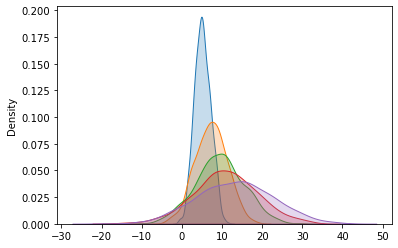

In [28]:
# Plot the KDE plots of the distributions in a single figure
for i in np.arange(0, len(means)): 
    sns.kdeplot(dist[i, :], palette = 'magma', fill = True)

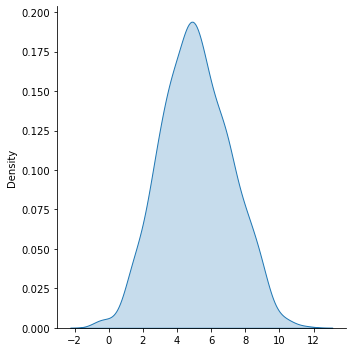

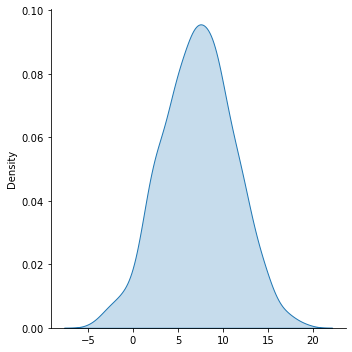

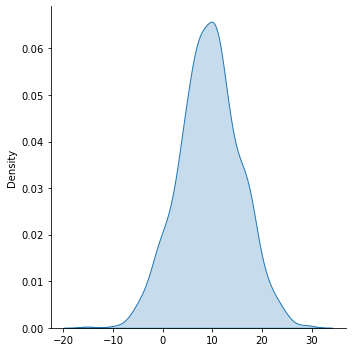

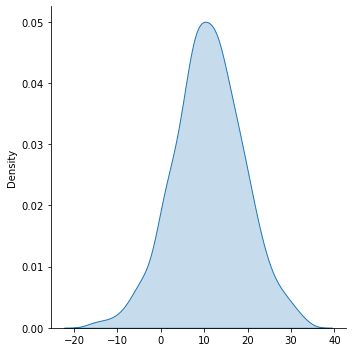

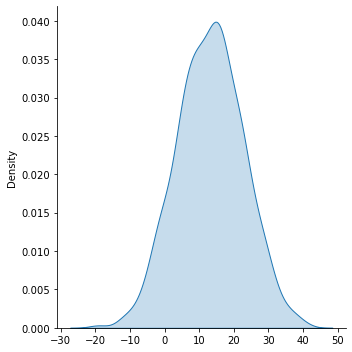

In [29]:
# Plot the KDE plots of the distributions in multiple subplots
#
# hint: you might need to use zip() to return two counters as a tuple
#       zip(my_index_vals, my_axis_vals)
#       https://docs.python.org/3/library/functions.html#zip
for i in range(len(means)):
    sns.displot(dist[i, :], kind = 'kde', palette = 'magma', fill = True)


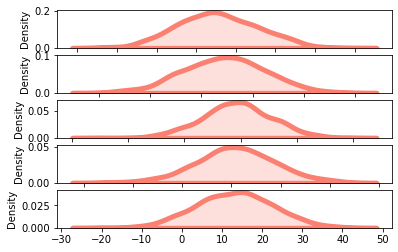

In [30]:
fig, axs = plt.subplots(ncols=1, nrows=5) # creating subplots with one column and 5 rows (5 graphs)

for i, ax in zip(np.arange(0,len(means)), axs.flat): # create flattened version of array that is able to be acessed
 sns.kdeplot(dist[i,:],
             fill=True,
             common_norm=False,
             color = 'salmon',
             alpha=.25,
             linewidth=5,
             ax=ax);


Explain why the single axis plot (first one above) and the multiple axis plot (the one using subplot) look so different. Which one is more informative and why?

The single axis plot is better than the multiple axis plot because you can see everything at once and it is easier to compare the different graphs with one another. Due to this ease of comparison, I think the singlpe plot axis is a little bit more inforamtive. However, I can see the reason as to why somebody would like the multiple axis plot as it does make it easier to distinguish each one from one another, but I like to see where they overlap. 

#### Correlated scatter plots using a while loop

Create 5 different scatterplots of correlated data (fine data points per plot would be fine). To do so you can create randn. You must use a while loop to create the plots sequentially.

In [6]:
# the plt.pause(0.05) might be of help 


### Simulate a bunch of experimental replications using while loops

Imagine, we wanted to simulate many many repeates of the same experiments. For example, imagine that we wanted to appreciate the variability of the data obtained in the experiments, under certain conditions of noise and variability in the data. 

How would we simulate a bunch of experiments? We obviously can't actually repeat the experiments in the real world. But, as data scientists, we do have a couple of options, both of which we can implement with `while` loops!

#### Monte Carlo Simulation
If we want to repeat the experment a bunch of times, let's consider what we know! We know that the website claims that:

* the scores are normally distributed
* they have a mean of 50
* and a standard deviation of 10

So we should be able to use `numpy.random.randn()` to generate numbers that meet the first critereon. Then we just have to scale the standard deviation up by 10 and set the mean to 50. Luckily, we know how to multiply (`*`) and add (`+`), respectively.

So here's our mission: 

* write a `while` loop that repeats `n_replications = 2000` times
* on each replication
    - compute the mean of the simulated experiment
    - store that mean in a `mc_means` numpy array
* do a histogram of the means
* make a kde also too
* compute the mean and standard deviation of the 2000 means
   - compare the "mean o' means" from your simulation with the data mean
   - compare the "standard deviation o' means" with the standard error of the data

The simulation via `while` loop:

In [19]:
n_experiments = 2000
avg_mean = 50 # mean from the website
avg_std = 10 # standard deviation of the website
mc_means = np.zeros((n_experiments, 1))  # creating the means array to store means from the simulations
counter = 1
while (counter < n_experiments):
    current_data = avg_mean + (avg_std * (np.random.randn(100,1)))
    current_mean = np.mean(current_data)
    mc_means[counter] = current_mean
    counter += 1
print(mc_means.shape)

(2000, 1)


Histogram of the means:

Text(0.5, 6.79999999999999, 'Simulated Means')

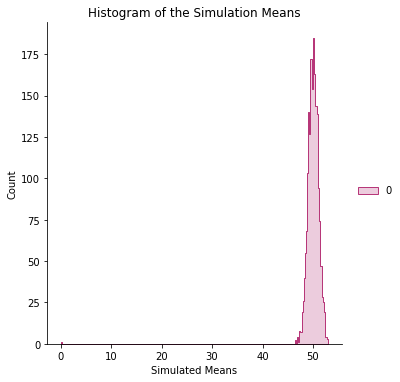

In [18]:
sns.displot(mc_means, kind = 'hist', palette = 'magma', element = 'step')
plt.title("Histogram of the Simulation Means")
plt.xlabel("Simulated Means")

KDE of the means

Text(0.5, 6.79999999999999, 'Simulated Means')

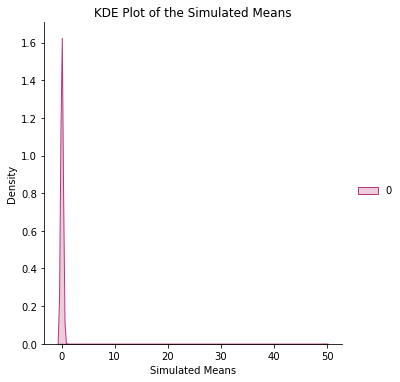

In [11]:
sns.displot(mc_means, kind = 'kde', palette = 'magma', fill = True)
plt.title("KDE Plot of the Simulated Means")
plt.xlabel("Simulated Means")

Compute the mean value of your simulation means:

In [122]:
simulated_mean = np.mean(mc_means)
print("Simulated Mean:", simulated_mean)

Simulated Mean: 50.00336494712679


Compare it with the original data mean:

Compute the standard deviation of your simulation means:

Compare it with the standard error you computed from the original data:

Which code is easier to write and read, the one from last week that used for-loops or the one from this week that used while-loops?